# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from statistics import print_p

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

## Load file and create dataframe

In [3]:
folder = './Data'

files = os.listdir(folder)

csv = 'NASA_TLX_haptics_2.csv'

In [4]:
answers_df = pd.read_csv(os.path.join(folder, csv))

# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df = answers_df[answers_df['subject number'] < 100]

## Separate dataframe depending on interface/run

In [5]:
types = ['remote', 'motion']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Motion']

answers_hw = {}
answers_hw[types[0]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[1]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']

## Separate questions

In [6]:
data = {}
data_hw = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data[i] = {}
    data_hw[i] = {}
    for q in questions:
        data[i][q] = answers[i][q].values
        data_hw[i][q] = answers_hw[i][q].values

## Compute mean and average

In [7]:
stats = {}
stats_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats[i] = {}
    stats_hw[i] = {}
    for q in questions:
        stats[i][q] = [0, 0]
        stats[i][q][mean_index] = np.mean(data[i][q])
        stats[i][q][std_index] = np.std(data[i][q])
        
        stats_hw[i][q] = [0, 0]
        stats_hw[i][q][mean_index] = np.mean(data_hw[i][q])
        stats_hw[i][q][std_index] = np.std(data_hw[i][q])
        
print(stats)

{'remote': {'How mentally demanding was the test?': [2.8, 0.8717797887081347], 'How physically demanding was the test?': [1.3, 0.45825756949558394], 'How hurried or rushed was the pace of the task?': [1.3, 0.45825756949558405], 'How successful were you in accomplishing what you were asked to do?': [2.4, 0.9165151389911681], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.0, 1.0]}, 'motion': {'How mentally demanding was the test?': [2.0, 1.0540925533894598], 'How physically demanding was the test?': [1.4444444444444444, 0.6849348892187752], 'How hurried or rushed was the pace of the task?': [1.2222222222222223, 0.628539361054709], 'How successful were you in accomplishing what you were asked to do?': [3.888888888888889, 0.7370277311900889], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.0, 0.0]}}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

In [8]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

In [9]:
for idx,i in enumerate(types):
    print()
    for j in types[idx+1:]:
        print()
        for q in questions:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones

                t, p = t_test_kruskal(data[i][q],data[j][q])
                print(i,j,q)
                print_p(p)



remote motion How mentally demanding was the test?
p = 0.10599426350123946
remote motion How physically demanding was the test?
p = 0.7635726487259695
remote motion How hurried or rushed was the pace of the task?
p = 0.42135683188931183
remote motion How successful were you in accomplishing what you were asked to do?
p = 0.003955851600090126 !!!!!!!!!!
remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.007347491016318628 !!!!!!!!!!



remote
{'How mentally demanding was the test?': [2.8, 0.8717797887081347], 'How physically demanding was the test?': [1.3, 0.45825756949558394], 'How hurried or rushed was the pace of the task?': [1.3, 0.45825756949558405], 'How successful were you in accomplishing what you were asked to do?': [2.4, 0.9165151389911681], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.0, 1.0]}
[2.8, 1.3, 1.3, 2.4, 2.0]
[0.8717797887081347, 0.45825756949558394, 0.45825756949558405, 0.9165151389911681, 1.0]
motion
{'How mentally demanding was the test?': [2.0, 1.0540925533894598], 'How physically demanding was the test?': [1.4444444444444444, 0.6849348892187752], 'How hurried or rushed was the pace of the task?': [1.2222222222222223, 0.628539361054709], 'How successful were you in accomplishing what you were asked to do?': [3.888888888888889, 0.7370277311900889], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.0, 0.0]}
[2.0, 1.4444444444444444, 1.222

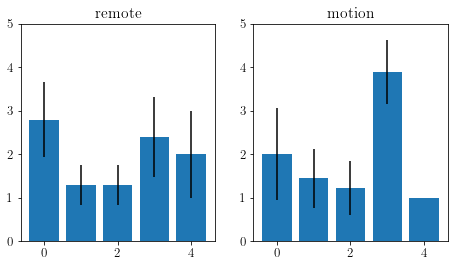

In [10]:
plt.figure(figsize=(16,4))

vals = []
errors = []

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    plt.ylim(0, 5)
    vals.append(means[3:5])
    errors.append(stds[3:5])

br


/Users/lis/Documents/github/Bidirectional_Interface/data_analysis/Surveys/../my_plots.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


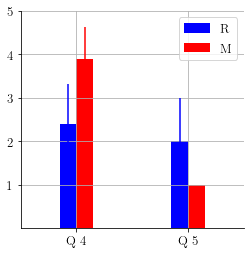

In [11]:
plt.figure(figsize=(4,4))
ax = plt.subplot(111)
my_plots.bar_multi(vals, errors, legend = ['R','M'], xlabels = ['Q 4', 'Q 5'], xlim = [0.5,2.5], yticks = [1,2,3,4,5], w =0.15, save = True, where = 'hapt_NASA.pdf', colors = 'br')

## <span style="color:red">Interesting statistics (see below)</span>
### remote motion How successful were you in accomplishing what you were asked to do?
### p = 0.003955851600090126 !!!!!!!!!!
### remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
### p = 0.007347491016318628 !!!!!!!!!!


In [12]:
for idx,i in enumerate(types):
    print()
    for j in types[idx+1:]:
        print()
        for q in questions:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones

                t, p = t_test_kruskal(data[i][q],data_hw[j][q])
                print(i,j,q)
                print_p(p)



remote motion How mentally demanding was the test?
p = 0.17221800761539136
remote motion How physically demanding was the test?
p = 0.39180485461850845
remote motion How hurried or rushed was the pace of the task?
p = 0.39180485461850845
remote motion How successful were you in accomplishing what you were asked to do?
p = 0.027030076547772428 !!!!!!
remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.16457177681334884



remote
{'How mentally demanding was the test?': [4.0, 0.0], 'How physically demanding was the test?': [1.3333333333333333, 0.4714045207910317], 'How hurried or rushed was the pace of the task?': [2.0, 0.0], 'How successful were you in accomplishing what you were asked to do?': [3.3333333333333335, 0.9428090415820634], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.3333333333333335, 1.247219128924647]}
[4.0, 1.3333333333333333, 2.0, 3.3333333333333335, 2.3333333333333335]
[0.0, 0.4714045207910317, 0.0, 0.9428090415820634, 1.247219128924647]
motion
{'How mentally demanding was the test?': [2.0, 0.0], 'How physically demanding was the test?': [1.0, 0.0], 'How hurried or rushed was the pace of the task?': [1.0, 0.0], 'How successful were you in accomplishing what you were asked to do?': [5.0, 0.0], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.0, 0.0]}
[2.0, 1.0, 1.0, 5.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


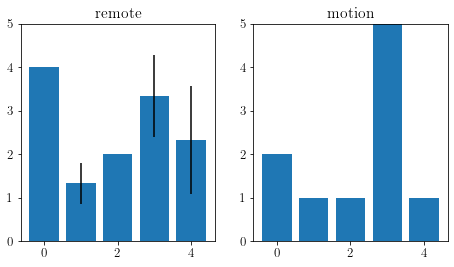

In [16]:
plt.figure(figsize=(16,4))

vals = []
errors = []

stats = stats_hw

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    plt.ylim(0, 5)
    vals.append(means)
    errors.append(stds)

br


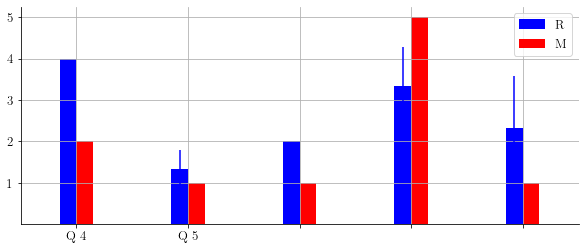

In [19]:
plt.figure(figsize=(10,4))
ax = plt.subplot(111)
my_plots.bar_multi(vals, errors, legend = ['R','M'], xlabels = ['Q 4', 'Q 5'], xlim = [0.5,5.5], yticks = [1,2,3,4,5], w =0.15, save = True, where = 'hapt_NASA.pdf', colors = 'br')